# 실습 1

## 1. Load data

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from dataset.mnist import load_mnist

(train_raw_img, train_label), (test_raw_img, test_label) = load_mnist(flatten=False, normalize=False)
print(train_raw_img.shape)
print(train_label.shape)

(60000, 1, 28, 28)
(60000,)


## 2. Preprocessing & Visualization

In [3]:
np.unique(train_label, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
       dtype=int64))

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


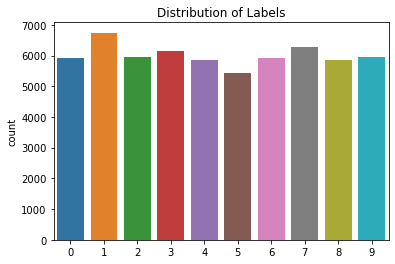

In [4]:
# 각 레이블 분포
sns.countplot(train_label)
plt.title("Distribution of Labels")
plt.show()

In [5]:
# train_dataset split according to the number
new_train_img = [[] for _ in range(10)]
new_train_label = [[] for _ in range(10)]

for i in range(len(train_label)) :
    new_train_img[train_label[i]].append(train_raw_img[i])
    new_train_label[train_label[i]].append(train_label[i])

print(len(new_train_img[0])) # 0에 해당하는 image 개수
print(new_train_img[0][0].shape) # 0에 해당하는 image중 첫번째 image의 shape

5923
(1, 28, 28)


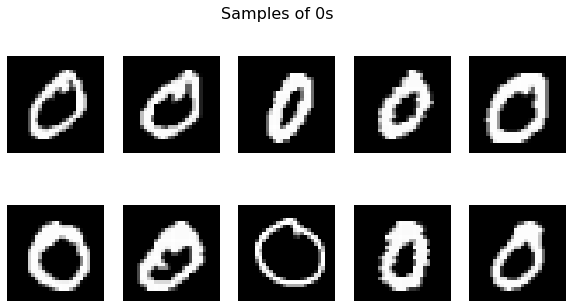

In [6]:
# 숫자 0의 이미지 샘픔들을 시각화
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(new_train_img[0][i].squeeze(), cmap="gray")  # Change this line
    plt.axis("off")
plt.suptitle("Samples of 0s", fontsize=16)
plt.show()

In [7]:
# 0인 이미지와 0이 아닌 이미지의 픽셀 값의 평균 및 표준 편차를 계산
mean_0 = np.mean(new_train_img[0])
std_0 = np.std(new_train_img[0])

non_zero_imgs = [img for i in range(1, 10) for img in new_train_img[i]]
mean_non_0 = np.mean(non_zero_imgs)
std_non_0 = np.std(non_zero_imgs)

print("[숫자 0]")
print(f"평균 픽셀 값: {mean_0}")
print(f"픽셀 값의 표준 편차: {std_0}")
print("\n[0이 아닌 숫자]")
print(f"평균 픽셀 값: {mean_non_0}")
print(f"픽셀 값의 표준 편차: {std_non_0}")

[숫자 0]
평균 픽셀 값: 44.21682790539819
픽셀 값의 표준 편차: 88.66807293975512

[0이 아닌 숫자]
평균 픽셀 값: 32.12472983534816
픽셀 값의 표준 편차: 77.28778949922649


## 3. Create a classifier that distinguishes between zero and non-zero (using logistic regression)

In [8]:
# idx에 해당하는 숫자를 대상으로 샘플 데이터 생성
def make_sample(idx) :
    sample_img = []
    sample_label = []
    
    # data sampling 
    for i in range(10) :
        if i == idx :
            sample_img += new_train_img[i][:1000]
            sample_label += (new_train_label[i][:1000])
        else :
            sample_img += new_train_img[i][:111]
            sample_label += (new_train_label[i][:111])

    sample_img = np.array(sample_img)
    sample_label = np.array(sample_label)
    
    # normalization (set value 0 ~ 1)
    sample_img = sample_img.astype('float')/255
    
    # target number는 1, 아니면 0
    sample_label = np.where(sample_label==idx, 1 ,0)
    
    # reshape
    sample_img = sample_img.reshape(len(sample_img.squeeze()), -1)
    sample_label = sample_label.reshape(len(sample_label.squeeze()), -1)
    
    return sample_img, sample_label

In [9]:
# idx = target number
train_X, train_y = make_sample(idx = 0)
# bias 추가
train_X = np.insert(train_X, 0, 1, axis=1)

print(train_y.shape)

(1999, 1)


In [10]:
# cross entropy loss
def CrossEntropyLoss(preds, y) :  
    delta = 1e-7
    loss = np.sum(-y*np.log(preds+delta)-(1-y)*np.log(1-preds+delta))/len(preds)
        
    return loss

In [11]:
loss = CrossEntropyLoss(np.zeros((len(train_X), 1)), train_y)
print('loss : ', loss)

loss :  8.063079315186753


In [36]:
# train
def train(X, y) :
    w = np.random.randn(len(X[0]), 1) # 
    lr = 0.01 # learning rate(수정)
    step = 0
    acc = 0
    
    loss_history = []
    acc_history = []
    
    while (acc < 0.85) :
        step += 1
        correct = 0
        
        # predict
        preds = 1 / (1+np.exp(-X.dot(w)))
        loss = CrossEntropyLoss(preds, y)
        
        result = np.where(preds>0.5, 1, 0)
        acc = np.sum(np.where(result==y, True, False))/len(preds)
        
        print("total step : %d " % step)
        print("error : %f, accuarcy : %f" % (loss, acc))
        
        loss_history.append(loss)
        acc_history.append(acc)
        
        # gradient descent 수행
        gradient = np.dot(X.T, (preds - y)) / len(X)
        w -= lr * gradient
    
    # loss와 accuracy 시각화
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(loss_history)
    plt.title("Loss history")
    plt.xlabel("Steps")
    plt.ylabel("Loss")

    plt.subplot(1, 2, 2)
    plt.plot(acc_history)
    plt.title("Accuracy history")
    plt.xlabel("Steps")
    plt.ylabel("Accuracy")

    plt.show()
        
    return w

total step : 1 
error : 5.711405, accuarcy : 0.393197
total step : 2 
error : 5.625301, accuarcy : 0.391196
total step : 3 
error : 5.538689, accuarcy : 0.389195
total step : 4 
error : 5.451702, accuarcy : 0.387694
total step : 5 
error : 5.364486, accuarcy : 0.388194
total step : 6 
error : 5.277197, accuarcy : 0.389695
total step : 7 
error : 5.190005, accuarcy : 0.387694
total step : 8 
error : 5.103085, accuarcy : 0.386693
total step : 9 
error : 5.016618, accuarcy : 0.387694
total step : 10 
error : 4.930783, accuarcy : 0.391696
total step : 11 
error : 4.845751, accuarcy : 0.389695
total step : 12 
error : 4.761687, accuarcy : 0.391696
total step : 13 
error : 4.678744, accuarcy : 0.395198
total step : 14 
error : 4.597068, accuarcy : 0.393697
total step : 15 
error : 4.516789, accuarcy : 0.394197
total step : 16 
error : 4.438025, accuarcy : 0.396698
total step : 17 
error : 4.360875, accuarcy : 0.398699
total step : 18 
error : 4.285425, accuarcy : 0.399700
total step : 19 
er

total step : 239 
error : 1.119920, accuarcy : 0.735368
total step : 240 
error : 1.116469, accuarcy : 0.736368
total step : 241 
error : 1.113043, accuarcy : 0.737369
total step : 242 
error : 1.109641, accuarcy : 0.737869
total step : 243 
error : 1.106262, accuarcy : 0.738369
total step : 244 
error : 1.102907, accuarcy : 0.739370
total step : 245 
error : 1.099576, accuarcy : 0.739370
total step : 246 
error : 1.096267, accuarcy : 0.739870
total step : 247 
error : 1.092981, accuarcy : 0.740370
total step : 248 
error : 1.089718, accuarcy : 0.741371
total step : 249 
error : 1.086477, accuarcy : 0.741371
total step : 250 
error : 1.083259, accuarcy : 0.741371
total step : 251 
error : 1.080062, accuarcy : 0.740870
total step : 252 
error : 1.076888, accuarcy : 0.742371
total step : 253 
error : 1.073734, accuarcy : 0.743372
total step : 254 
error : 1.070603, accuarcy : 0.743372
total step : 255 
error : 1.067492, accuarcy : 0.744872
total step : 256 
error : 1.064403, accuarcy : 0

total step : 490 
error : 0.669780, accuarcy : 0.832416
total step : 491 
error : 0.668867, accuarcy : 0.832916
total step : 492 
error : 0.667958, accuarcy : 0.832916
total step : 493 
error : 0.667053, accuarcy : 0.832916
total step : 494 
error : 0.666151, accuarcy : 0.832916
total step : 495 
error : 0.665252, accuarcy : 0.832916
total step : 496 
error : 0.664357, accuarcy : 0.833917
total step : 497 
error : 0.663465, accuarcy : 0.834417
total step : 498 
error : 0.662576, accuarcy : 0.834417
total step : 499 
error : 0.661691, accuarcy : 0.834417
total step : 500 
error : 0.660809, accuarcy : 0.834417
total step : 501 
error : 0.659931, accuarcy : 0.834417
total step : 502 
error : 0.659056, accuarcy : 0.834917
total step : 503 
error : 0.658184, accuarcy : 0.835418
total step : 504 
error : 0.657315, accuarcy : 0.835918
total step : 505 
error : 0.656450, accuarcy : 0.836418
total step : 506 
error : 0.655587, accuarcy : 0.836418
total step : 507 
error : 0.654728, accuarcy : 0

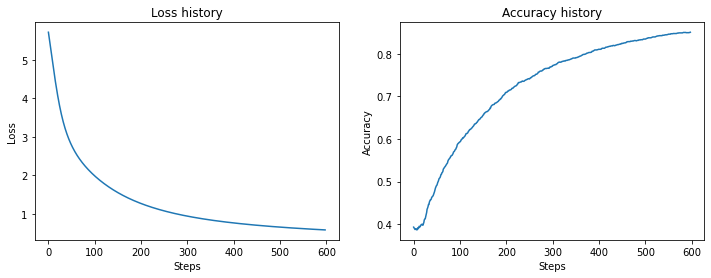

In [37]:
# save weight
w = train(train_X, train_y)

In [38]:
# eval (accuracy)
def eval(idx, w) :
    test_X = test_raw_img.astype('float')/255    
    test_X = test_X.reshape(len(test_X.squeeze()), -1)
    # bias
    test_X = np.insert(test_X, 0, 1, axis=1) 

    test_y = np.where(test_label==idx, 1 ,0)
    test_y = test_y.reshape(len(test_y.squeeze()), -1)
    
    preds = 1/(1+np.exp(-test_X.dot(w)))
    result = np.where(preds>0.5, 1, 0)
    
    acc = np.sum(np.where(result==test_y, True, False))/len(preds)
    print('accuracy : ', acc)

eval(idx=0, w=w)

accuracy :  0.8319


# 실습 2

### 2. multi class single label classification (using logistic regression)

In [44]:
# while의 조건만 바뀜
# train
def train(X, y) :
    w = np.random.randn(len(X[0]), 1) # 
    lr = 0.01 # learning rate(수정)
    step = 0
    acc = 0
    
    loss_history = []
    acc_history = []
    
    while (acc < 0.8) :
        step += 1
        correct = 0
        
        # predict
        preds = 1 / (1+np.exp(-X.dot(w)))
        loss = CrossEntropyLoss(preds, y)
        
        result = np.where(preds>0.5, 1, 0)
        acc = np.sum(np.where(result==y, True, False))/len(preds)
        
        print("total step : %d " % step)
        print("error : %f, accuarcy : %f" % (loss, acc))
        
        loss_history.append(loss)
        acc_history.append(acc)
        
        # gradient descent 수행
        gradient = np.dot(X.T, (preds - y)) / len(X)
        w -= lr * gradient
    
    # loss와 accuracy 시각화
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(loss_history)
    plt.title("Loss history")
    plt.xlabel("Steps")
    plt.ylabel("Loss")

    plt.subplot(1, 2, 2)
    plt.plot(acc_history)
    plt.title("Accuracy history")
    plt.xlabel("Steps")
    plt.ylabel("Accuracy")

    plt.show()
        
    return w

Training model for number 0
total step : 1 
error : 1.668747, accuarcy : 0.691846
total step : 2 
error : 1.649441, accuarcy : 0.693847
total step : 3 
error : 1.630689, accuarcy : 0.696348
total step : 4 
error : 1.612478, accuarcy : 0.698349
total step : 5 
error : 1.594795, accuarcy : 0.698349
total step : 6 
error : 1.577625, accuarcy : 0.702351
total step : 7 
error : 1.560956, accuarcy : 0.700850
total step : 8 
error : 1.544775, accuarcy : 0.700850
total step : 9 
error : 1.529069, accuarcy : 0.701351
total step : 10 
error : 1.513825, accuarcy : 0.704352
total step : 11 
error : 1.499031, accuarcy : 0.706853
total step : 12 
error : 1.484675, accuarcy : 0.710355
total step : 13 
error : 1.470744, accuarcy : 0.709855
total step : 14 
error : 1.457226, accuarcy : 0.710855
total step : 15 
error : 1.444110, accuarcy : 0.714357
total step : 16 
error : 1.431385, accuarcy : 0.713857
total step : 17 
error : 1.419037, accuarcy : 0.713357
total step : 18 
error : 1.407057, accuarcy : 

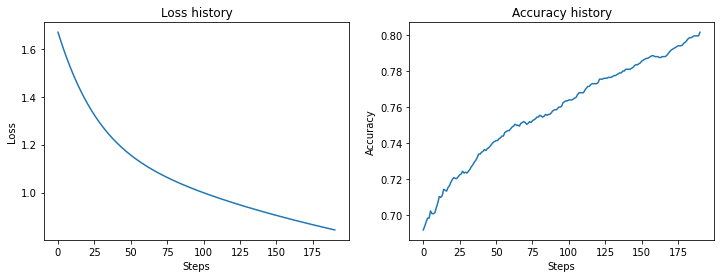

Training model for number 1
total step : 1 
error : 4.249613, accuarcy : 0.334667
total step : 2 
error : 4.215963, accuarcy : 0.336168
total step : 3 
error : 4.182497, accuarcy : 0.337669
total step : 4 
error : 4.149219, accuarcy : 0.339170
total step : 5 
error : 4.116133, accuarcy : 0.341671
total step : 6 
error : 4.083242, accuarcy : 0.341671
total step : 7 
error : 4.050548, accuarcy : 0.341171
total step : 8 
error : 4.018054, accuarcy : 0.341171
total step : 9 
error : 3.985762, accuarcy : 0.345673
total step : 10 
error : 3.953675, accuarcy : 0.345173
total step : 11 
error : 3.921794, accuarcy : 0.346173
total step : 12 
error : 3.890121, accuarcy : 0.345673
total step : 13 
error : 3.858656, accuarcy : 0.346673
total step : 14 
error : 3.827402, accuarcy : 0.347174
total step : 15 
error : 3.796358, accuarcy : 0.347674
total step : 16 
error : 3.765527, accuarcy : 0.349175
total step : 17 
error : 3.734907, accuarcy : 0.350675
total step : 18 
error : 3.704499, accuarcy : 

total step : 170 
error : 1.190689, accuarcy : 0.645823
total step : 171 
error : 1.184139, accuarcy : 0.646823
total step : 172 
error : 1.177661, accuarcy : 0.649825
total step : 173 
error : 1.171253, accuarcy : 0.650325
total step : 174 
error : 1.164915, accuarcy : 0.651326
total step : 175 
error : 1.158647, accuarcy : 0.653327
total step : 176 
error : 1.152446, accuarcy : 0.654827
total step : 177 
error : 1.146312, accuarcy : 0.655828
total step : 178 
error : 1.140245, accuarcy : 0.659330
total step : 179 
error : 1.134243, accuarcy : 0.659330
total step : 180 
error : 1.128306, accuarcy : 0.661331
total step : 181 
error : 1.122432, accuarcy : 0.662831
total step : 182 
error : 1.116621, accuarcy : 0.663832
total step : 183 
error : 1.110872, accuarcy : 0.666333
total step : 184 
error : 1.105184, accuarcy : 0.669335
total step : 185 
error : 1.099556, accuarcy : 0.670835
total step : 186 
error : 1.093988, accuarcy : 0.671836
total step : 187 
error : 1.088478, accuarcy : 0

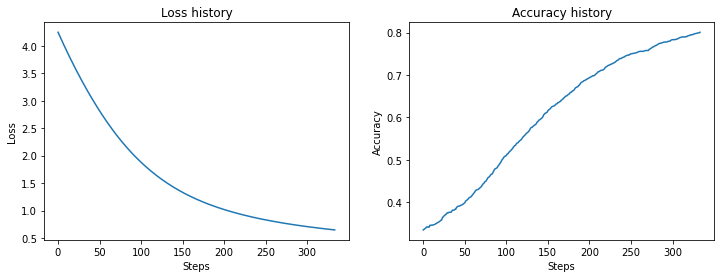

Training model for number 2
total step : 1 
error : 4.403248, accuarcy : 0.472736
total step : 2 
error : 4.335695, accuarcy : 0.473237
total step : 3 
error : 4.268992, accuarcy : 0.472236
total step : 4 
error : 4.203208, accuarcy : 0.472736
total step : 5 
error : 4.138409, accuarcy : 0.472236
total step : 6 
error : 4.074655, accuarcy : 0.474237
total step : 7 
error : 4.012002, accuarcy : 0.480240
total step : 8 
error : 3.950500, accuarcy : 0.477239
total step : 9 
error : 3.890193, accuarcy : 0.480740
total step : 10 
error : 3.831120, accuarcy : 0.482741
total step : 11 
error : 3.773313, accuarcy : 0.481241
total step : 12 
error : 3.716801, accuarcy : 0.481741
total step : 13 
error : 3.661605, accuarcy : 0.479240
total step : 14 
error : 3.607745, accuarcy : 0.478239
total step : 15 
error : 3.555234, accuarcy : 0.481241
total step : 16 
error : 3.504079, accuarcy : 0.482241
total step : 17 
error : 3.454284, accuarcy : 0.485743
total step : 18 
error : 3.405847, accuarcy : 

total step : 161 
error : 1.719198, accuarcy : 0.633817
total step : 162 
error : 1.715405, accuarcy : 0.635818
total step : 163 
error : 1.711627, accuarcy : 0.635818
total step : 164 
error : 1.707864, accuarcy : 0.636318
total step : 165 
error : 1.704116, accuarcy : 0.636818
total step : 166 
error : 1.700382, accuarcy : 0.636818
total step : 167 
error : 1.696663, accuarcy : 0.637819
total step : 168 
error : 1.692959, accuarcy : 0.639320
total step : 169 
error : 1.689268, accuarcy : 0.639820
total step : 170 
error : 1.685592, accuarcy : 0.640820
total step : 171 
error : 1.681930, accuarcy : 0.641321
total step : 172 
error : 1.678282, accuarcy : 0.641321
total step : 173 
error : 1.674648, accuarcy : 0.642321
total step : 174 
error : 1.671027, accuarcy : 0.643322
total step : 175 
error : 1.667420, accuarcy : 0.643322
total step : 176 
error : 1.663826, accuarcy : 0.643322
total step : 177 
error : 1.660246, accuarcy : 0.643322
total step : 178 
error : 1.656679, accuarcy : 0

total step : 331 
error : 1.234756, accuarcy : 0.708354
total step : 332 
error : 1.232660, accuarcy : 0.709855
total step : 333 
error : 1.230572, accuarcy : 0.709855
total step : 334 
error : 1.228490, accuarcy : 0.710855
total step : 335 
error : 1.226416, accuarcy : 0.710855
total step : 336 
error : 1.224348, accuarcy : 0.710855
total step : 337 
error : 1.222287, accuarcy : 0.710855
total step : 338 
error : 1.220233, accuarcy : 0.710855
total step : 339 
error : 1.218186, accuarcy : 0.710855
total step : 340 
error : 1.216145, accuarcy : 0.710855
total step : 341 
error : 1.214112, accuarcy : 0.710855
total step : 342 
error : 1.212085, accuarcy : 0.710855
total step : 343 
error : 1.210064, accuarcy : 0.710855
total step : 344 
error : 1.208051, accuarcy : 0.711856
total step : 345 
error : 1.206044, accuarcy : 0.711856
total step : 346 
error : 1.204043, accuarcy : 0.711856
total step : 347 
error : 1.202049, accuarcy : 0.711856
total step : 348 
error : 1.200062, accuarcy : 0

total step : 507 
error : 0.952425, accuarcy : 0.752876
total step : 508 
error : 0.951220, accuarcy : 0.754377
total step : 509 
error : 0.950019, accuarcy : 0.754377
total step : 510 
error : 0.948821, accuarcy : 0.754377
total step : 511 
error : 0.947627, accuarcy : 0.754377
total step : 512 
error : 0.946436, accuarcy : 0.754877
total step : 513 
error : 0.945249, accuarcy : 0.755378
total step : 514 
error : 0.944065, accuarcy : 0.755378
total step : 515 
error : 0.942885, accuarcy : 0.755878
total step : 516 
error : 0.941709, accuarcy : 0.755878
total step : 517 
error : 0.940536, accuarcy : 0.755878
total step : 518 
error : 0.939366, accuarcy : 0.755878
total step : 519 
error : 0.938200, accuarcy : 0.756378
total step : 520 
error : 0.937037, accuarcy : 0.756878
total step : 521 
error : 0.935878, accuarcy : 0.756878
total step : 522 
error : 0.934722, accuarcy : 0.756878
total step : 523 
error : 0.933570, accuarcy : 0.757379
total step : 524 
error : 0.932421, accuarcy : 0

total step : 682 
error : 0.786898, accuarcy : 0.785393
total step : 683 
error : 0.786166, accuarcy : 0.785393
total step : 684 
error : 0.785435, accuarcy : 0.785393
total step : 685 
error : 0.784706, accuarcy : 0.785893
total step : 686 
error : 0.783980, accuarcy : 0.785893
total step : 687 
error : 0.783255, accuarcy : 0.785893
total step : 688 
error : 0.782532, accuarcy : 0.786393
total step : 689 
error : 0.781811, accuarcy : 0.786393
total step : 690 
error : 0.781092, accuarcy : 0.786393
total step : 691 
error : 0.780375, accuarcy : 0.786893
total step : 692 
error : 0.779659, accuarcy : 0.786893
total step : 693 
error : 0.778946, accuarcy : 0.787394
total step : 694 
error : 0.778234, accuarcy : 0.787394
total step : 695 
error : 0.777524, accuarcy : 0.787394
total step : 696 
error : 0.776816, accuarcy : 0.787394
total step : 697 
error : 0.776110, accuarcy : 0.787894
total step : 698 
error : 0.775406, accuarcy : 0.788394
total step : 699 
error : 0.774704, accuarcy : 0

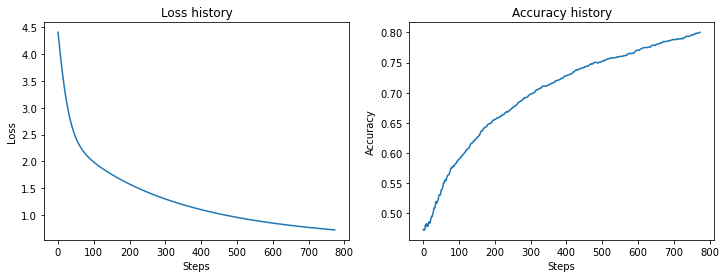

Training model for number 3
total step : 1 
error : 3.980134, accuarcy : 0.407704
total step : 2 
error : 3.942180, accuarcy : 0.409705
total step : 3 
error : 3.904967, accuarcy : 0.410205
total step : 4 
error : 3.868498, accuarcy : 0.413707
total step : 5 
error : 3.832773, accuarcy : 0.415708
total step : 6 
error : 3.797793, accuarcy : 0.418709
total step : 7 
error : 3.763556, accuarcy : 0.418709
total step : 8 
error : 3.730060, accuarcy : 0.418209
total step : 9 
error : 3.697300, accuarcy : 0.420210
total step : 10 
error : 3.665270, accuarcy : 0.419710
total step : 11 
error : 3.633963, accuarcy : 0.423712
total step : 12 
error : 3.603371, accuarcy : 0.424212
total step : 13 
error : 3.573484, accuarcy : 0.427214
total step : 14 
error : 3.544291, accuarcy : 0.427714
total step : 15 
error : 3.515779, accuarcy : 0.429215
total step : 16 
error : 3.487937, accuarcy : 0.431216
total step : 17 
error : 3.460749, accuarcy : 0.434217
total step : 18 
error : 3.434202, accuarcy : 

total step : 156 
error : 1.967012, accuarcy : 0.598299
total step : 157 
error : 1.961610, accuarcy : 0.599300
total step : 158 
error : 1.956238, accuarcy : 0.600800
total step : 159 
error : 1.950897, accuarcy : 0.600800
total step : 160 
error : 1.945586, accuarcy : 0.600800
total step : 161 
error : 1.940306, accuarcy : 0.600800
total step : 162 
error : 1.935055, accuarcy : 0.601301
total step : 163 
error : 1.929835, accuarcy : 0.602801
total step : 164 
error : 1.924643, accuarcy : 0.603302
total step : 165 
error : 1.919481, accuarcy : 0.603302
total step : 166 
error : 1.914348, accuarcy : 0.603802
total step : 167 
error : 1.909244, accuarcy : 0.604802
total step : 168 
error : 1.904168, accuarcy : 0.606303
total step : 169 
error : 1.899120, accuarcy : 0.607804
total step : 170 
error : 1.894101, accuarcy : 0.608804
total step : 171 
error : 1.889110, accuarcy : 0.609805
total step : 172 
error : 1.884146, accuarcy : 0.609305
total step : 173 
error : 1.879210, accuarcy : 0

total step : 334 
error : 1.342651, accuarcy : 0.694847
total step : 335 
error : 1.340474, accuarcy : 0.694847
total step : 336 
error : 1.338306, accuarcy : 0.695348
total step : 337 
error : 1.336149, accuarcy : 0.695848
total step : 338 
error : 1.334001, accuarcy : 0.696348
total step : 339 
error : 1.331864, accuarcy : 0.696848
total step : 340 
error : 1.329736, accuarcy : 0.696848
total step : 341 
error : 1.327618, accuarcy : 0.696848
total step : 342 
error : 1.325510, accuarcy : 0.697849
total step : 343 
error : 1.323412, accuarcy : 0.698849
total step : 344 
error : 1.321323, accuarcy : 0.698849
total step : 345 
error : 1.319244, accuarcy : 0.699350
total step : 346 
error : 1.317174, accuarcy : 0.699850
total step : 347 
error : 1.315114, accuarcy : 0.700350
total step : 348 
error : 1.313063, accuarcy : 0.700350
total step : 349 
error : 1.311022, accuarcy : 0.699850
total step : 350 
error : 1.308990, accuarcy : 0.699850
total step : 351 
error : 1.306967, accuarcy : 0

error : 1.068933, accuarcy : 0.753877
total step : 516 
error : 1.067900, accuarcy : 0.753877
total step : 517 
error : 1.066870, accuarcy : 0.753877
total step : 518 
error : 1.065844, accuarcy : 0.753877
total step : 519 
error : 1.064821, accuarcy : 0.753877
total step : 520 
error : 1.063802, accuarcy : 0.754377
total step : 521 
error : 1.062787, accuarcy : 0.754377
total step : 522 
error : 1.061775, accuarcy : 0.753877
total step : 523 
error : 1.060767, accuarcy : 0.753377
total step : 524 
error : 1.059762, accuarcy : 0.753877
total step : 525 
error : 1.058760, accuarcy : 0.753877
total step : 526 
error : 1.057763, accuarcy : 0.753877
total step : 527 
error : 1.056768, accuarcy : 0.753877
total step : 528 
error : 1.055777, accuarcy : 0.753877
total step : 529 
error : 1.054789, accuarcy : 0.754377
total step : 530 
error : 1.053805, accuarcy : 0.754377
total step : 531 
error : 1.052824, accuarcy : 0.754377
total step : 532 
error : 1.051846, accuarcy : 0.754877
total step

total step : 700 
error : 0.924143, accuarcy : 0.777389
total step : 701 
error : 0.923550, accuarcy : 0.777889
total step : 702 
error : 0.922959, accuarcy : 0.777889
total step : 703 
error : 0.922368, accuarcy : 0.777889
total step : 704 
error : 0.921780, accuarcy : 0.777889
total step : 705 
error : 0.921193, accuarcy : 0.777889
total step : 706 
error : 0.920607, accuarcy : 0.778389
total step : 707 
error : 0.920023, accuarcy : 0.778389
total step : 708 
error : 0.919440, accuarcy : 0.778389
total step : 709 
error : 0.918859, accuarcy : 0.780390
total step : 710 
error : 0.918279, accuarcy : 0.780890
total step : 711 
error : 0.917701, accuarcy : 0.780890
total step : 712 
error : 0.917124, accuarcy : 0.781391
total step : 713 
error : 0.916548, accuarcy : 0.781391
total step : 714 
error : 0.915975, accuarcy : 0.781391
total step : 715 
error : 0.915402, accuarcy : 0.781391
total step : 716 
error : 0.914831, accuarcy : 0.782391
total step : 717 
error : 0.914261, accuarcy : 0

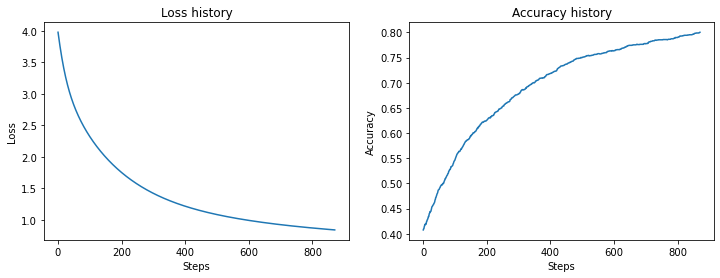

Training model for number 4
total step : 1 
error : 5.234192, accuarcy : 0.516258
total step : 2 
error : 5.201286, accuarcy : 0.517759
total step : 3 
error : 5.168436, accuarcy : 0.519260
total step : 4 
error : 5.135658, accuarcy : 0.517759
total step : 5 
error : 5.102965, accuarcy : 0.517759
total step : 6 
error : 5.070373, accuarcy : 0.516258
total step : 7 
error : 5.037893, accuarcy : 0.514757
total step : 8 
error : 5.005538, accuarcy : 0.514257
total step : 9 
error : 4.973319, accuarcy : 0.513757
total step : 10 
error : 4.941246, accuarcy : 0.514257
total step : 11 
error : 4.909328, accuarcy : 0.515258
total step : 12 
error : 4.877573, accuarcy : 0.514757
total step : 13 
error : 4.845987, accuarcy : 0.512756
total step : 14 
error : 4.814577, accuarcy : 0.511756
total step : 15 
error : 4.783348, accuarcy : 0.510255
total step : 16 
error : 4.752305, accuarcy : 0.514757
total step : 17 
error : 4.721452, accuarcy : 0.515258
total step : 18 
error : 4.690792, accuarcy : 

total step : 221 
error : 1.833923, accuarcy : 0.607804
total step : 222 
error : 1.827713, accuarcy : 0.608304
total step : 223 
error : 1.821536, accuarcy : 0.608804
total step : 224 
error : 1.815391, accuarcy : 0.608804
total step : 225 
error : 1.809278, accuarcy : 0.609805
total step : 226 
error : 1.803196, accuarcy : 0.611806
total step : 227 
error : 1.797147, accuarcy : 0.613307
total step : 228 
error : 1.791129, accuarcy : 0.612806
total step : 229 
error : 1.785142, accuarcy : 0.613807
total step : 230 
error : 1.779187, accuarcy : 0.613807
total step : 231 
error : 1.773263, accuarcy : 0.613807
total step : 232 
error : 1.767370, accuarcy : 0.613807
total step : 233 
error : 1.761508, accuarcy : 0.615308
total step : 234 
error : 1.755677, accuarcy : 0.615308
total step : 235 
error : 1.749877, accuarcy : 0.615808
total step : 236 
error : 1.744107, accuarcy : 0.616808
total step : 237 
error : 1.738367, accuarcy : 0.617309
total step : 238 
error : 1.732659, accuarcy : 0

total step : 381 
error : 1.163263, accuarcy : 0.705853
total step : 382 
error : 1.160566, accuarcy : 0.706353
total step : 383 
error : 1.157882, accuarcy : 0.706853
total step : 384 
error : 1.155210, accuarcy : 0.708854
total step : 385 
error : 1.152550, accuarcy : 0.710355
total step : 386 
error : 1.149903, accuarcy : 0.710355
total step : 387 
error : 1.147269, accuarcy : 0.711856
total step : 388 
error : 1.144646, accuarcy : 0.713357
total step : 389 
error : 1.142036, accuarcy : 0.713357
total step : 390 
error : 1.139438, accuarcy : 0.713357
total step : 391 
error : 1.136852, accuarcy : 0.713357
total step : 392 
error : 1.134279, accuarcy : 0.712856
total step : 393 
error : 1.131717, accuarcy : 0.714857
total step : 394 
error : 1.129167, accuarcy : 0.715358
total step : 395 
error : 1.126628, accuarcy : 0.715858
total step : 396 
error : 1.124102, accuarcy : 0.715858
total step : 397 
error : 1.121587, accuarcy : 0.716358
total step : 398 
error : 1.119083, accuarcy : 0

total step : 567 
error : 0.820192, accuarcy : 0.775888
total step : 568 
error : 0.818965, accuarcy : 0.775888
total step : 569 
error : 0.817743, accuarcy : 0.776388
total step : 570 
error : 0.816525, accuarcy : 0.776888
total step : 571 
error : 0.815312, accuarcy : 0.777389
total step : 572 
error : 0.814103, accuarcy : 0.777889
total step : 573 
error : 0.812899, accuarcy : 0.778389
total step : 574 
error : 0.811699, accuarcy : 0.778389
total step : 575 
error : 0.810504, accuarcy : 0.778389
total step : 576 
error : 0.809314, accuarcy : 0.778389
total step : 577 
error : 0.808128, accuarcy : 0.778889
total step : 578 
error : 0.806946, accuarcy : 0.779390
total step : 579 
error : 0.805769, accuarcy : 0.779890
total step : 580 
error : 0.804596, accuarcy : 0.779890
total step : 581 
error : 0.803427, accuarcy : 0.780390
total step : 582 
error : 0.802263, accuarcy : 0.780390
total step : 583 
error : 0.801103, accuarcy : 0.781391
total step : 584 
error : 0.799948, accuarcy : 0

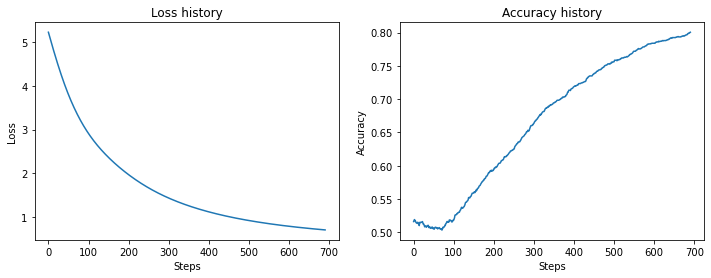

Training model for number 5
total step : 1 
error : 3.376899, accuarcy : 0.508254
total step : 2 
error : 3.351898, accuarcy : 0.507254
total step : 3 
error : 3.327558, accuarcy : 0.507254
total step : 4 
error : 3.303867, accuarcy : 0.506753
total step : 5 
error : 3.280815, accuarcy : 0.506253
total step : 6 
error : 3.258390, accuarcy : 0.507254
total step : 7 
error : 3.236578, accuarcy : 0.507254
total step : 8 
error : 3.215367, accuarcy : 0.507254
total step : 9 
error : 3.194742, accuarcy : 0.507254
total step : 10 
error : 3.174689, accuarcy : 0.507254
total step : 11 
error : 3.155193, accuarcy : 0.505753
total step : 12 
error : 3.136239, accuarcy : 0.505753
total step : 13 
error : 3.117813, accuarcy : 0.505753
total step : 14 
error : 3.099899, accuarcy : 0.503752
total step : 15 
error : 3.082481, accuarcy : 0.501751
total step : 16 
error : 3.065547, accuarcy : 0.501751
total step : 17 
error : 3.049079, accuarcy : 0.502751
total step : 18 
error : 3.033065, accuarcy : 

total step : 156 
error : 2.185336, accuarcy : 0.532766
total step : 157 
error : 2.181664, accuarcy : 0.532766
total step : 158 
error : 2.178004, accuarcy : 0.534767
total step : 159 
error : 2.174355, accuarcy : 0.535268
total step : 160 
error : 2.170717, accuarcy : 0.536268
total step : 161 
error : 2.167091, accuarcy : 0.536768
total step : 162 
error : 2.163475, accuarcy : 0.537769
total step : 163 
error : 2.159871, accuarcy : 0.538269
total step : 164 
error : 2.156278, accuarcy : 0.538769
total step : 165 
error : 2.152696, accuarcy : 0.539770
total step : 166 
error : 2.149125, accuarcy : 0.540770
total step : 167 
error : 2.145565, accuarcy : 0.541271
total step : 168 
error : 2.142016, accuarcy : 0.541271
total step : 169 
error : 2.138478, accuarcy : 0.541271
total step : 170 
error : 2.134950, accuarcy : 0.541771
total step : 171 
error : 2.131433, accuarcy : 0.541271
total step : 172 
error : 2.127927, accuarcy : 0.542771
total step : 173 
error : 2.124432, accuarcy : 0

total step : 331 
error : 1.682920, accuarcy : 0.604302
total step : 332 
error : 1.680700, accuarcy : 0.604302
total step : 333 
error : 1.678486, accuarcy : 0.605303
total step : 334 
error : 1.676277, accuarcy : 0.606803
total step : 335 
error : 1.674075, accuarcy : 0.607804
total step : 336 
error : 1.671878, accuarcy : 0.608304
total step : 337 
error : 1.669687, accuarcy : 0.608804
total step : 338 
error : 1.667501, accuarcy : 0.609305
total step : 339 
error : 1.665322, accuarcy : 0.609305
total step : 340 
error : 1.663148, accuarcy : 0.609305
total step : 341 
error : 1.660979, accuarcy : 0.609305
total step : 342 
error : 1.658817, accuarcy : 0.610305
total step : 343 
error : 1.656660, accuarcy : 0.610305
total step : 344 
error : 1.654508, accuarcy : 0.610805
total step : 345 
error : 1.652362, accuarcy : 0.611306
total step : 346 
error : 1.650222, accuarcy : 0.611806
total step : 347 
error : 1.648087, accuarcy : 0.611806
total step : 348 
error : 1.645958, accuarcy : 0

total step : 532 
error : 1.330569, accuarcy : 0.661331
total step : 533 
error : 1.329195, accuarcy : 0.661331
total step : 534 
error : 1.327824, accuarcy : 0.661331
total step : 535 
error : 1.326456, accuarcy : 0.662331
total step : 536 
error : 1.325091, accuarcy : 0.661831
total step : 537 
error : 1.323729, accuarcy : 0.661831
total step : 538 
error : 1.322370, accuarcy : 0.661831
total step : 539 
error : 1.321013, accuarcy : 0.661831
total step : 540 
error : 1.319660, accuarcy : 0.661831
total step : 541 
error : 1.318310, accuarcy : 0.661831
total step : 542 
error : 1.316963, accuarcy : 0.661831
total step : 543 
error : 1.315619, accuarcy : 0.662331
total step : 544 
error : 1.314278, accuarcy : 0.662831
total step : 545 
error : 1.312939, accuarcy : 0.662831
total step : 546 
error : 1.311604, accuarcy : 0.663832
total step : 547 
error : 1.310271, accuarcy : 0.664332
total step : 548 
error : 1.308942, accuarcy : 0.664332
total step : 549 
error : 1.307615, accuarcy : 0

total step : 730 
error : 1.108472, accuarcy : 0.700850
total step : 731 
error : 1.107564, accuarcy : 0.700850
total step : 732 
error : 1.106657, accuarcy : 0.701351
total step : 733 
error : 1.105753, accuarcy : 0.701351
total step : 734 
error : 1.104850, accuarcy : 0.701851
total step : 735 
error : 1.103949, accuarcy : 0.702851
total step : 736 
error : 1.103049, accuarcy : 0.702851
total step : 737 
error : 1.102152, accuarcy : 0.702851
total step : 738 
error : 1.101256, accuarcy : 0.702851
total step : 739 
error : 1.100362, accuarcy : 0.702851
total step : 740 
error : 1.099470, accuarcy : 0.702851
total step : 741 
error : 1.098579, accuarcy : 0.703352
total step : 742 
error : 1.097690, accuarcy : 0.703352
total step : 743 
error : 1.096803, accuarcy : 0.703852
total step : 744 
error : 1.095917, accuarcy : 0.704852
total step : 745 
error : 1.095034, accuarcy : 0.704852
total step : 746 
error : 1.094152, accuarcy : 0.704852
total step : 747 
error : 1.093271, accuarcy : 0

total step : 916 
error : 0.965645, accuarcy : 0.734867
total step : 917 
error : 0.964997, accuarcy : 0.734867
total step : 918 
error : 0.964351, accuarcy : 0.734867
total step : 919 
error : 0.963705, accuarcy : 0.734867
total step : 920 
error : 0.963061, accuarcy : 0.734867
total step : 921 
error : 0.962418, accuarcy : 0.734867
total step : 922 
error : 0.961776, accuarcy : 0.734867
total step : 923 
error : 0.961135, accuarcy : 0.734867
total step : 924 
error : 0.960495, accuarcy : 0.735368
total step : 925 
error : 0.959856, accuarcy : 0.735368
total step : 926 
error : 0.959218, accuarcy : 0.735368
total step : 927 
error : 0.958581, accuarcy : 0.735368
total step : 928 
error : 0.957945, accuarcy : 0.735368
total step : 929 
error : 0.957311, accuarcy : 0.735368
total step : 930 
error : 0.956677, accuarcy : 0.735368
total step : 931 
error : 0.956044, accuarcy : 0.735368
total step : 932 
error : 0.955413, accuarcy : 0.735368
total step : 933 
error : 0.954782, accuarcy : 0

total step : 1090 
error : 0.867237, accuarcy : 0.751376
total step : 1091 
error : 0.866744, accuarcy : 0.751376
total step : 1092 
error : 0.866251, accuarcy : 0.751376
total step : 1093 
error : 0.865759, accuarcy : 0.751376
total step : 1094 
error : 0.865268, accuarcy : 0.751376
total step : 1095 
error : 0.864778, accuarcy : 0.751876
total step : 1096 
error : 0.864288, accuarcy : 0.751876
total step : 1097 
error : 0.863799, accuarcy : 0.751876
total step : 1098 
error : 0.863311, accuarcy : 0.751876
total step : 1099 
error : 0.862823, accuarcy : 0.751876
total step : 1100 
error : 0.862336, accuarcy : 0.751876
total step : 1101 
error : 0.861850, accuarcy : 0.751876
total step : 1102 
error : 0.861364, accuarcy : 0.751876
total step : 1103 
error : 0.860880, accuarcy : 0.752376
total step : 1104 
error : 0.860396, accuarcy : 0.752376
total step : 1105 
error : 0.859912, accuarcy : 0.752376
total step : 1106 
error : 0.859430, accuarcy : 0.752376
total step : 1107 
error : 0.85

total step : 1287 
error : 0.782236, accuarcy : 0.771886
total step : 1288 
error : 0.781859, accuarcy : 0.771886
total step : 1289 
error : 0.781483, accuarcy : 0.771886
total step : 1290 
error : 0.781107, accuarcy : 0.771886
total step : 1291 
error : 0.780732, accuarcy : 0.771886
total step : 1292 
error : 0.780357, accuarcy : 0.771886
total step : 1293 
error : 0.779983, accuarcy : 0.771886
total step : 1294 
error : 0.779609, accuarcy : 0.772386
total step : 1295 
error : 0.779236, accuarcy : 0.772386
total step : 1296 
error : 0.778863, accuarcy : 0.772386
total step : 1297 
error : 0.778490, accuarcy : 0.772386
total step : 1298 
error : 0.778118, accuarcy : 0.772386
total step : 1299 
error : 0.777747, accuarcy : 0.772386
total step : 1300 
error : 0.777376, accuarcy : 0.772386
total step : 1301 
error : 0.777005, accuarcy : 0.772386
total step : 1302 
error : 0.776635, accuarcy : 0.772386
total step : 1303 
error : 0.776266, accuarcy : 0.772386
total step : 1304 
error : 0.77

total step : 1454 
error : 0.725414, accuarcy : 0.788894
total step : 1455 
error : 0.725108, accuarcy : 0.788894
total step : 1456 
error : 0.724801, accuarcy : 0.788894
total step : 1457 
error : 0.724495, accuarcy : 0.788894
total step : 1458 
error : 0.724189, accuarcy : 0.788894
total step : 1459 
error : 0.723884, accuarcy : 0.788894
total step : 1460 
error : 0.723579, accuarcy : 0.788894
total step : 1461 
error : 0.723274, accuarcy : 0.788894
total step : 1462 
error : 0.722970, accuarcy : 0.788894
total step : 1463 
error : 0.722666, accuarcy : 0.789395
total step : 1464 
error : 0.722362, accuarcy : 0.789395
total step : 1465 
error : 0.722059, accuarcy : 0.789395
total step : 1466 
error : 0.721756, accuarcy : 0.789395
total step : 1467 
error : 0.721454, accuarcy : 0.789395
total step : 1468 
error : 0.721152, accuarcy : 0.789395
total step : 1469 
error : 0.720850, accuarcy : 0.789395
total step : 1470 
error : 0.720548, accuarcy : 0.789395
total step : 1471 
error : 0.72

total step : 1627 
error : 0.677223, accuarcy : 0.796898
total step : 1628 
error : 0.676970, accuarcy : 0.796898
total step : 1629 
error : 0.676718, accuarcy : 0.797399
total step : 1630 
error : 0.676466, accuarcy : 0.797399
total step : 1631 
error : 0.676214, accuarcy : 0.797399
total step : 1632 
error : 0.675963, accuarcy : 0.797399
total step : 1633 
error : 0.675712, accuarcy : 0.797399
total step : 1634 
error : 0.675461, accuarcy : 0.797399
total step : 1635 
error : 0.675210, accuarcy : 0.797399
total step : 1636 
error : 0.674960, accuarcy : 0.797399
total step : 1637 
error : 0.674710, accuarcy : 0.797399
total step : 1638 
error : 0.674460, accuarcy : 0.797399
total step : 1639 
error : 0.674210, accuarcy : 0.797399
total step : 1640 
error : 0.673961, accuarcy : 0.797399
total step : 1641 
error : 0.673712, accuarcy : 0.797399
total step : 1642 
error : 0.673463, accuarcy : 0.797399
total step : 1643 
error : 0.673215, accuarcy : 0.797899
total step : 1644 
error : 0.67

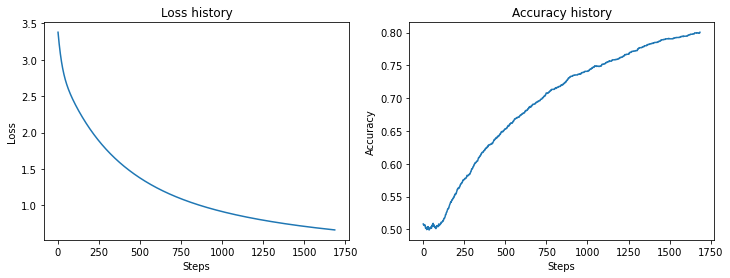

Training model for number 6
total step : 1 
error : 3.230331, accuarcy : 0.393697
total step : 2 
error : 3.209706, accuarcy : 0.396198
total step : 3 
error : 3.189469, accuarcy : 0.398199
total step : 4 
error : 3.169607, accuarcy : 0.401201
total step : 5 
error : 3.150108, accuarcy : 0.403202
total step : 6 
error : 3.130962, accuarcy : 0.405703
total step : 7 
error : 3.112155, accuarcy : 0.406203
total step : 8 
error : 3.093678, accuarcy : 0.410205
total step : 9 
error : 3.075518, accuarcy : 0.412706
total step : 10 
error : 3.057665, accuarcy : 0.413707
total step : 11 
error : 3.040109, accuarcy : 0.415208
total step : 12 
error : 3.022838, accuarcy : 0.416208
total step : 13 
error : 3.005843, accuarcy : 0.418209
total step : 14 
error : 2.989114, accuarcy : 0.422211
total step : 15 
error : 2.972642, accuarcy : 0.423712
total step : 16 
error : 2.956417, accuarcy : 0.423712
total step : 17 
error : 2.940431, accuarcy : 0.424712
total step : 18 
error : 2.924674, accuarcy : 

total step : 164 
error : 1.579100, accuarcy : 0.606303
total step : 165 
error : 1.573406, accuarcy : 0.607304
total step : 166 
error : 1.567746, accuarcy : 0.607304
total step : 167 
error : 1.562120, accuarcy : 0.607804
total step : 168 
error : 1.556528, accuarcy : 0.608804
total step : 169 
error : 1.550970, accuarcy : 0.609805
total step : 170 
error : 1.545446, accuarcy : 0.610805
total step : 171 
error : 1.539954, accuarcy : 0.612306
total step : 172 
error : 1.534496, accuarcy : 0.613807
total step : 173 
error : 1.529071, accuarcy : 0.613807
total step : 174 
error : 1.523678, accuarcy : 0.613307
total step : 175 
error : 1.518318, accuarcy : 0.614807
total step : 176 
error : 1.512990, accuarcy : 0.615308
total step : 177 
error : 1.507695, accuarcy : 0.615808
total step : 178 
error : 1.502431, accuarcy : 0.616808
total step : 179 
error : 1.497199, accuarcy : 0.619310
total step : 180 
error : 1.491999, accuarcy : 0.619810
total step : 181 
error : 1.486830, accuarcy : 0

total step : 339 
error : 0.950970, accuarcy : 0.734867
total step : 340 
error : 0.948791, accuarcy : 0.734867
total step : 341 
error : 0.946622, accuarcy : 0.734867
total step : 342 
error : 0.944464, accuarcy : 0.735368
total step : 343 
error : 0.942315, accuarcy : 0.735868
total step : 344 
error : 0.940177, accuarcy : 0.735868
total step : 345 
error : 0.938048, accuarcy : 0.735868
total step : 346 
error : 0.935929, accuarcy : 0.735868
total step : 347 
error : 0.933821, accuarcy : 0.736868
total step : 348 
error : 0.931722, accuarcy : 0.736868
total step : 349 
error : 0.929632, accuarcy : 0.737369
total step : 350 
error : 0.927553, accuarcy : 0.737869
total step : 351 
error : 0.925482, accuarcy : 0.738869
total step : 352 
error : 0.923422, accuarcy : 0.738869
total step : 353 
error : 0.921371, accuarcy : 0.739370
total step : 354 
error : 0.919329, accuarcy : 0.739370
total step : 355 
error : 0.917297, accuarcy : 0.739870
total step : 356 
error : 0.915274, accuarcy : 0

total step : 523 
error : 0.674861, accuarcy : 0.796398
total step : 524 
error : 0.673852, accuarcy : 0.796398
total step : 525 
error : 0.672847, accuarcy : 0.796398
total step : 526 
error : 0.671846, accuarcy : 0.796398
total step : 527 
error : 0.670849, accuarcy : 0.796898
total step : 528 
error : 0.669855, accuarcy : 0.797399
total step : 529 
error : 0.668864, accuarcy : 0.798399
total step : 530 
error : 0.667878, accuarcy : 0.798899
total step : 531 
error : 0.666895, accuarcy : 0.798899
total step : 532 
error : 0.665916, accuarcy : 0.798899
total step : 533 
error : 0.664940, accuarcy : 0.799400
total step : 534 
error : 0.663968, accuarcy : 0.799400
total step : 535 
error : 0.662999, accuarcy : 0.799900
total step : 536 
error : 0.662034, accuarcy : 0.799900
total step : 537 
error : 0.661072, accuarcy : 0.800900


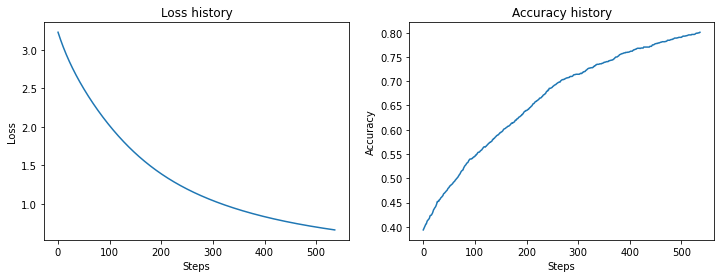

Training model for number 7
total step : 1 
error : 4.436948, accuarcy : 0.340170
total step : 2 
error : 4.416498, accuarcy : 0.341171
total step : 3 
error : 4.396115, accuarcy : 0.341671
total step : 4 
error : 4.375801, accuarcy : 0.343172
total step : 5 
error : 4.355556, accuarcy : 0.343672
total step : 6 
error : 4.335379, accuarcy : 0.344172
total step : 7 
error : 4.315273, accuarcy : 0.345173
total step : 8 
error : 4.295236, accuarcy : 0.347174
total step : 9 
error : 4.275270, accuarcy : 0.348174
total step : 10 
error : 4.255374, accuarcy : 0.350675
total step : 11 
error : 4.235551, accuarcy : 0.351176
total step : 12 
error : 4.215798, accuarcy : 0.352676
total step : 13 
error : 4.196118, accuarcy : 0.355678
total step : 14 
error : 4.176511, accuarcy : 0.358179
total step : 15 
error : 4.156976, accuarcy : 0.359180
total step : 16 
error : 4.137515, accuarcy : 0.359680
total step : 17 
error : 4.118127, accuarcy : 0.359180
total step : 18 
error : 4.098813, accuarcy : 

total step : 208 
error : 1.735142, accuarcy : 0.581791
total step : 209 
error : 1.728371, accuarcy : 0.583292
total step : 210 
error : 1.721642, accuarcy : 0.583292
total step : 211 
error : 1.714956, accuarcy : 0.585793
total step : 212 
error : 1.708313, accuarcy : 0.586293
total step : 213 
error : 1.701712, accuarcy : 0.586293
total step : 214 
error : 1.695153, accuarcy : 0.587794
total step : 215 
error : 1.688635, accuarcy : 0.589295
total step : 216 
error : 1.682159, accuarcy : 0.589295
total step : 217 
error : 1.675725, accuarcy : 0.589295
total step : 218 
error : 1.669331, accuarcy : 0.590295
total step : 219 
error : 1.662978, accuarcy : 0.590795
total step : 220 
error : 1.656666, accuarcy : 0.590795
total step : 221 
error : 1.650395, accuarcy : 0.592296
total step : 222 
error : 1.644163, accuarcy : 0.593297
total step : 223 
error : 1.637971, accuarcy : 0.595298
total step : 224 
error : 1.631819, accuarcy : 0.596798
total step : 225 
error : 1.625706, accuarcy : 0

total step : 374 
error : 1.040370, accuarcy : 0.711356
total step : 375 
error : 1.037944, accuarcy : 0.711356
total step : 376 
error : 1.035532, accuarcy : 0.712356
total step : 377 
error : 1.033132, accuarcy : 0.712856
total step : 378 
error : 1.030745, accuarcy : 0.712856
total step : 379 
error : 1.028371, accuarcy : 0.712856
total step : 380 
error : 1.026009, accuarcy : 0.713357
total step : 381 
error : 1.023659, accuarcy : 0.713857
total step : 382 
error : 1.021322, accuarcy : 0.714857
total step : 383 
error : 1.018997, accuarcy : 0.714857
total step : 384 
error : 1.016684, accuarcy : 0.715358
total step : 385 
error : 1.014384, accuarcy : 0.716358
total step : 386 
error : 1.012095, accuarcy : 0.717359
total step : 387 
error : 1.009818, accuarcy : 0.717859
total step : 388 
error : 1.007553, accuarcy : 0.718359
total step : 389 
error : 1.005300, accuarcy : 0.718359
total step : 390 
error : 1.003058, accuarcy : 0.719360
total step : 391 
error : 1.000827, accuarcy : 0

total step : 544 
error : 0.757745, accuarcy : 0.772386
total step : 545 
error : 0.756619, accuarcy : 0.772386
total step : 546 
error : 0.755497, accuarcy : 0.772386
total step : 547 
error : 0.754380, accuarcy : 0.772886
total step : 548 
error : 0.753266, accuarcy : 0.773387
total step : 549 
error : 0.752157, accuarcy : 0.773387
total step : 550 
error : 0.751052, accuarcy : 0.773887
total step : 551 
error : 0.749952, accuarcy : 0.774387
total step : 552 
error : 0.748855, accuarcy : 0.776388
total step : 553 
error : 0.747763, accuarcy : 0.776388
total step : 554 
error : 0.746674, accuarcy : 0.776388
total step : 555 
error : 0.745590, accuarcy : 0.776388
total step : 556 
error : 0.744510, accuarcy : 0.776388
total step : 557 
error : 0.743433, accuarcy : 0.776388
total step : 558 
error : 0.742361, accuarcy : 0.776888
total step : 559 
error : 0.741293, accuarcy : 0.776888
total step : 560 
error : 0.740229, accuarcy : 0.776888
total step : 561 
error : 0.739169, accuarcy : 0

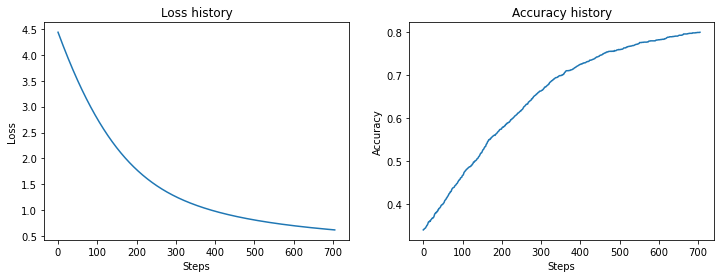

Training model for number 8
total step : 1 
error : 3.069243, accuarcy : 0.550775
total step : 2 
error : 3.040674, accuarcy : 0.550775
total step : 3 
error : 3.012938, accuarcy : 0.548774
total step : 4 
error : 2.986011, accuarcy : 0.550775
total step : 5 
error : 2.959872, accuarcy : 0.552276
total step : 6 
error : 2.934498, accuarcy : 0.550775
total step : 7 
error : 2.909868, accuarcy : 0.550775
total step : 8 
error : 2.885960, accuarcy : 0.550275
total step : 9 
error : 2.862755, accuarcy : 0.552776
total step : 10 
error : 2.840231, accuarcy : 0.553777
total step : 11 
error : 2.818370, accuarcy : 0.554277
total step : 12 
error : 2.797151, accuarcy : 0.555778
total step : 13 
error : 2.776557, accuarcy : 0.554777
total step : 14 
error : 2.756568, accuarcy : 0.554277
total step : 15 
error : 2.737167, accuarcy : 0.556278
total step : 16 
error : 2.718336, accuarcy : 0.555778
total step : 17 
error : 2.700059, accuarcy : 0.554277
total step : 18 
error : 2.682318, accuarcy : 

total step : 169 
error : 1.849060, accuarcy : 0.601301
total step : 170 
error : 1.846306, accuarcy : 0.601801
total step : 171 
error : 1.843562, accuarcy : 0.602301
total step : 172 
error : 1.840826, accuarcy : 0.602801
total step : 173 
error : 1.838099, accuarcy : 0.603302
total step : 174 
error : 1.835382, accuarcy : 0.603802
total step : 175 
error : 1.832673, accuarcy : 0.604802
total step : 176 
error : 1.829973, accuarcy : 0.605803
total step : 177 
error : 1.827282, accuarcy : 0.607304
total step : 178 
error : 1.824599, accuarcy : 0.606803
total step : 179 
error : 1.821926, accuarcy : 0.606803
total step : 180 
error : 1.819261, accuarcy : 0.606803
total step : 181 
error : 1.816604, accuarcy : 0.607304
total step : 182 
error : 1.813956, accuarcy : 0.607804
total step : 183 
error : 1.811317, accuarcy : 0.608304
total step : 184 
error : 1.808686, accuarcy : 0.609305
total step : 185 
error : 1.806064, accuarcy : 0.609805
total step : 186 
error : 1.803450, accuarcy : 0

total step : 356 
error : 1.458920, accuarcy : 0.656828
total step : 357 
error : 1.457371, accuarcy : 0.656828
total step : 358 
error : 1.455826, accuarcy : 0.656828
total step : 359 
error : 1.454286, accuarcy : 0.656828
total step : 360 
error : 1.452750, accuarcy : 0.656828
total step : 361 
error : 1.451218, accuarcy : 0.656828
total step : 362 
error : 1.449691, accuarcy : 0.657329
total step : 363 
error : 1.448169, accuarcy : 0.656828
total step : 364 
error : 1.446650, accuarcy : 0.656828
total step : 365 
error : 1.445136, accuarcy : 0.657329
total step : 366 
error : 1.443627, accuarcy : 0.657829
total step : 367 
error : 1.442121, accuarcy : 0.657829
total step : 368 
error : 1.440620, accuarcy : 0.657829
total step : 369 
error : 1.439124, accuarcy : 0.658329
total step : 370 
error : 1.437631, accuarcy : 0.658329
total step : 371 
error : 1.436143, accuarcy : 0.658829
total step : 372 
error : 1.434659, accuarcy : 0.659330
total step : 373 
error : 1.433180, accuarcy : 0

total step : 540 
error : 1.234485, accuarcy : 0.688344
total step : 541 
error : 1.233531, accuarcy : 0.688844
total step : 542 
error : 1.232579, accuarcy : 0.688844
total step : 543 
error : 1.231629, accuarcy : 0.689345
total step : 544 
error : 1.230682, accuarcy : 0.689345
total step : 545 
error : 1.229737, accuarcy : 0.689345
total step : 546 
error : 1.228794, accuarcy : 0.689345
total step : 547 
error : 1.227854, accuarcy : 0.689345
total step : 548 
error : 1.226915, accuarcy : 0.688844
total step : 549 
error : 1.225979, accuarcy : 0.689345
total step : 550 
error : 1.225045, accuarcy : 0.689345
total step : 551 
error : 1.224114, accuarcy : 0.689345
total step : 552 
error : 1.223184, accuarcy : 0.689345
total step : 553 
error : 1.222257, accuarcy : 0.689345
total step : 554 
error : 1.221332, accuarcy : 0.689345
total step : 555 
error : 1.220409, accuarcy : 0.689345
total step : 556 
error : 1.219488, accuarcy : 0.689345
total step : 557 
error : 1.218570, accuarcy : 0

total step : 746 
error : 1.076994, accuarcy : 0.713357
total step : 747 
error : 1.076384, accuarcy : 0.713357
total step : 748 
error : 1.075775, accuarcy : 0.713857
total step : 749 
error : 1.075167, accuarcy : 0.713857
total step : 750 
error : 1.074561, accuarcy : 0.713857
total step : 751 
error : 1.073956, accuarcy : 0.714357
total step : 752 
error : 1.073351, accuarcy : 0.714857
total step : 753 
error : 1.072748, accuarcy : 0.714857
total step : 754 
error : 1.072147, accuarcy : 0.714857
total step : 755 
error : 1.071546, accuarcy : 0.715358
total step : 756 
error : 1.070947, accuarcy : 0.715358
total step : 757 
error : 1.070348, accuarcy : 0.715858
total step : 758 
error : 1.069751, accuarcy : 0.715858
total step : 759 
error : 1.069155, accuarcy : 0.716358
total step : 760 
error : 1.068560, accuarcy : 0.716358
total step : 761 
error : 1.067967, accuarcy : 0.716358
total step : 762 
error : 1.067374, accuarcy : 0.716358
total step : 763 
error : 1.066783, accuarcy : 0

total step : 950 
error : 0.973060, accuarcy : 0.738369
total step : 951 
error : 0.972635, accuarcy : 0.738369
total step : 952 
error : 0.972210, accuarcy : 0.738869
total step : 953 
error : 0.971785, accuarcy : 0.738869
total step : 954 
error : 0.971362, accuarcy : 0.738869
total step : 955 
error : 0.970939, accuarcy : 0.738869
total step : 956 
error : 0.970516, accuarcy : 0.738869
total step : 957 
error : 0.970094, accuarcy : 0.738869
total step : 958 
error : 0.969673, accuarcy : 0.738869
total step : 959 
error : 0.969253, accuarcy : 0.738869
total step : 960 
error : 0.968833, accuarcy : 0.739370
total step : 961 
error : 0.968414, accuarcy : 0.739870
total step : 962 
error : 0.967996, accuarcy : 0.739870
total step : 963 
error : 0.967578, accuarcy : 0.739870
total step : 964 
error : 0.967161, accuarcy : 0.739870
total step : 965 
error : 0.966744, accuarcy : 0.739870
total step : 966 
error : 0.966328, accuarcy : 0.739870
total step : 967 
error : 0.965913, accuarcy : 0

total step : 1139 
error : 0.902755, accuarcy : 0.755378
total step : 1140 
error : 0.902429, accuarcy : 0.755378
total step : 1141 
error : 0.902104, accuarcy : 0.755378
total step : 1142 
error : 0.901779, accuarcy : 0.755378
total step : 1143 
error : 0.901454, accuarcy : 0.755878
total step : 1144 
error : 0.901130, accuarcy : 0.755878
total step : 1145 
error : 0.900806, accuarcy : 0.755878
total step : 1146 
error : 0.900483, accuarcy : 0.755878
total step : 1147 
error : 0.900160, accuarcy : 0.755878
total step : 1148 
error : 0.899838, accuarcy : 0.755878
total step : 1149 
error : 0.899516, accuarcy : 0.755878
total step : 1150 
error : 0.899194, accuarcy : 0.755878
total step : 1151 
error : 0.898873, accuarcy : 0.755878
total step : 1152 
error : 0.898552, accuarcy : 0.755878
total step : 1153 
error : 0.898231, accuarcy : 0.755878
total step : 1154 
error : 0.897911, accuarcy : 0.755878
total step : 1155 
error : 0.897592, accuarcy : 0.755878
total step : 1156 
error : 0.89

total step : 1327 
error : 0.847860, accuarcy : 0.765883
total step : 1328 
error : 0.847598, accuarcy : 0.765383
total step : 1329 
error : 0.847336, accuarcy : 0.765883
total step : 1330 
error : 0.847074, accuarcy : 0.765883
total step : 1331 
error : 0.846813, accuarcy : 0.765883
total step : 1332 
error : 0.846552, accuarcy : 0.765883
total step : 1333 
error : 0.846291, accuarcy : 0.765883
total step : 1334 
error : 0.846030, accuarcy : 0.765883
total step : 1335 
error : 0.845770, accuarcy : 0.765883
total step : 1336 
error : 0.845510, accuarcy : 0.765883
total step : 1337 
error : 0.845251, accuarcy : 0.765883
total step : 1338 
error : 0.844991, accuarcy : 0.765883
total step : 1339 
error : 0.844732, accuarcy : 0.766383
total step : 1340 
error : 0.844473, accuarcy : 0.766883
total step : 1341 
error : 0.844215, accuarcy : 0.766883
total step : 1342 
error : 0.843956, accuarcy : 0.766883
total step : 1343 
error : 0.843698, accuarcy : 0.766883
total step : 1344 
error : 0.84

total step : 1506 
error : 0.804888, accuarcy : 0.775388
total step : 1507 
error : 0.804668, accuarcy : 0.775388
total step : 1508 
error : 0.804448, accuarcy : 0.775388
total step : 1509 
error : 0.804228, accuarcy : 0.775388
total step : 1510 
error : 0.804009, accuarcy : 0.775388
total step : 1511 
error : 0.803790, accuarcy : 0.775388
total step : 1512 
error : 0.803571, accuarcy : 0.775388
total step : 1513 
error : 0.803352, accuarcy : 0.775888
total step : 1514 
error : 0.803133, accuarcy : 0.775888
total step : 1515 
error : 0.802915, accuarcy : 0.775888
total step : 1516 
error : 0.802697, accuarcy : 0.775888
total step : 1517 
error : 0.802479, accuarcy : 0.775888
total step : 1518 
error : 0.802261, accuarcy : 0.775888
total step : 1519 
error : 0.802043, accuarcy : 0.775888
total step : 1520 
error : 0.801826, accuarcy : 0.775888
total step : 1521 
error : 0.801609, accuarcy : 0.775888
total step : 1522 
error : 0.801392, accuarcy : 0.775888
total step : 1523 
error : 0.80

total step : 1693 
error : 0.766921, accuarcy : 0.781391
total step : 1694 
error : 0.766733, accuarcy : 0.781391
total step : 1695 
error : 0.766546, accuarcy : 0.781391
total step : 1696 
error : 0.766359, accuarcy : 0.781391
total step : 1697 
error : 0.766172, accuarcy : 0.780890
total step : 1698 
error : 0.765985, accuarcy : 0.780890
total step : 1699 
error : 0.765798, accuarcy : 0.780890
total step : 1700 
error : 0.765612, accuarcy : 0.780890
total step : 1701 
error : 0.765425, accuarcy : 0.780890
total step : 1702 
error : 0.765239, accuarcy : 0.780890
total step : 1703 
error : 0.765053, accuarcy : 0.780890
total step : 1704 
error : 0.764867, accuarcy : 0.780890
total step : 1705 
error : 0.764681, accuarcy : 0.780890
total step : 1706 
error : 0.764495, accuarcy : 0.780890
total step : 1707 
error : 0.764310, accuarcy : 0.780890
total step : 1708 
error : 0.764125, accuarcy : 0.780890
total step : 1709 
error : 0.763939, accuarcy : 0.781391
total step : 1710 
error : 0.76

total step : 1878 
error : 0.734600, accuarcy : 0.789395
total step : 1879 
error : 0.734438, accuarcy : 0.789895
total step : 1880 
error : 0.734275, accuarcy : 0.789895
total step : 1881 
error : 0.734112, accuarcy : 0.789895
total step : 1882 
error : 0.733950, accuarcy : 0.789895
total step : 1883 
error : 0.733787, accuarcy : 0.789895
total step : 1884 
error : 0.733625, accuarcy : 0.789895
total step : 1885 
error : 0.733463, accuarcy : 0.789895
total step : 1886 
error : 0.733301, accuarcy : 0.789895
total step : 1887 
error : 0.733139, accuarcy : 0.789895
total step : 1888 
error : 0.732977, accuarcy : 0.789895
total step : 1889 
error : 0.732816, accuarcy : 0.789895
total step : 1890 
error : 0.732654, accuarcy : 0.789895
total step : 1891 
error : 0.732493, accuarcy : 0.789895
total step : 1892 
error : 0.732331, accuarcy : 0.789895
total step : 1893 
error : 0.732170, accuarcy : 0.789895
total step : 1894 
error : 0.732009, accuarcy : 0.790395
total step : 1895 
error : 0.73

total step : 2070 
error : 0.705326, accuarcy : 0.797899
total step : 2071 
error : 0.705183, accuarcy : 0.797899
total step : 2072 
error : 0.705040, accuarcy : 0.797899
total step : 2073 
error : 0.704898, accuarcy : 0.797899
total step : 2074 
error : 0.704755, accuarcy : 0.797899
total step : 2075 
error : 0.704613, accuarcy : 0.797899
total step : 2076 
error : 0.704470, accuarcy : 0.797899
total step : 2077 
error : 0.704328, accuarcy : 0.797899
total step : 2078 
error : 0.704186, accuarcy : 0.797899
total step : 2079 
error : 0.704044, accuarcy : 0.797899
total step : 2080 
error : 0.703902, accuarcy : 0.797899
total step : 2081 
error : 0.703760, accuarcy : 0.797899
total step : 2082 
error : 0.703618, accuarcy : 0.797899
total step : 2083 
error : 0.703477, accuarcy : 0.797899
total step : 2084 
error : 0.703335, accuarcy : 0.797899
total step : 2085 
error : 0.703194, accuarcy : 0.797899
total step : 2086 
error : 0.703052, accuarcy : 0.797899
total step : 2087 
error : 0.70

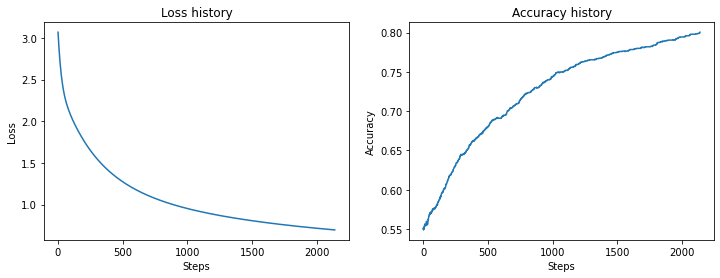

Training model for number 9
total step : 1 
error : 5.304839, accuarcy : 0.395698
total step : 2 
error : 5.271915, accuarcy : 0.396198
total step : 3 
error : 5.239165, accuarcy : 0.396198
total step : 4 
error : 5.206601, accuarcy : 0.396198
total step : 5 
error : 5.174229, accuarcy : 0.394197
total step : 6 
error : 5.142060, accuarcy : 0.393697
total step : 7 
error : 5.110101, accuarcy : 0.390695
total step : 8 
error : 5.078362, accuarcy : 0.388694
total step : 9 
error : 5.046851, accuarcy : 0.388694
total step : 10 
error : 5.015576, accuarcy : 0.387694
total step : 11 
error : 4.984545, accuarcy : 0.386193
total step : 12 
error : 4.953768, accuarcy : 0.384192
total step : 13 
error : 4.923252, accuarcy : 0.381191
total step : 14 
error : 4.893004, accuarcy : 0.382191
total step : 15 
error : 4.863032, accuarcy : 0.381191
total step : 16 
error : 4.833342, accuarcy : 0.380690
total step : 17 
error : 4.803941, accuarcy : 0.381191
total step : 18 
error : 4.774836, accuarcy : 

total step : 151 
error : 2.691664, accuarcy : 0.452726
total step : 152 
error : 2.682117, accuarcy : 0.453727
total step : 153 
error : 2.672618, accuarcy : 0.453227
total step : 154 
error : 2.663167, accuarcy : 0.453727
total step : 155 
error : 2.653764, accuarcy : 0.455228
total step : 156 
error : 2.644408, accuarcy : 0.455228
total step : 157 
error : 2.635099, accuarcy : 0.455228
total step : 158 
error : 2.625838, accuarcy : 0.457729
total step : 159 
error : 2.616623, accuarcy : 0.457729
total step : 160 
error : 2.607455, accuarcy : 0.458229
total step : 161 
error : 2.598333, accuarcy : 0.459730
total step : 162 
error : 2.589258, accuarcy : 0.459730
total step : 163 
error : 2.580228, accuarcy : 0.461731
total step : 164 
error : 2.571245, accuarcy : 0.461731
total step : 165 
error : 2.562307, accuarcy : 0.462731
total step : 166 
error : 2.553415, accuarcy : 0.462731
total step : 167 
error : 2.544568, accuarcy : 0.463732
total step : 168 
error : 2.535767, accuarcy : 0

total step : 358 
error : 1.494223, accuarcy : 0.614807
total step : 359 
error : 1.491075, accuarcy : 0.615308
total step : 360 
error : 1.487942, accuarcy : 0.615808
total step : 361 
error : 1.484825, accuarcy : 0.616308
total step : 362 
error : 1.481722, accuarcy : 0.617309
total step : 363 
error : 1.478635, accuarcy : 0.617809
total step : 364 
error : 1.475562, accuarcy : 0.618309
total step : 365 
error : 1.472505, accuarcy : 0.619810
total step : 366 
error : 1.469462, accuarcy : 0.620310
total step : 367 
error : 1.466433, accuarcy : 0.620310
total step : 368 
error : 1.463419, accuarcy : 0.621311
total step : 369 
error : 1.460420, accuarcy : 0.622311
total step : 370 
error : 1.457435, accuarcy : 0.623812
total step : 371 
error : 1.454464, accuarcy : 0.624312
total step : 372 
error : 1.451507, accuarcy : 0.624312
total step : 373 
error : 1.448564, accuarcy : 0.624312
total step : 374 
error : 1.445635, accuarcy : 0.625313
total step : 375 
error : 1.442720, accuarcy : 0

total step : 539 
error : 1.100996, accuarcy : 0.690845
total step : 540 
error : 1.099527, accuarcy : 0.690845
total step : 541 
error : 1.098063, accuarcy : 0.690845
total step : 542 
error : 1.096605, accuarcy : 0.690845
total step : 543 
error : 1.095153, accuarcy : 0.691346
total step : 544 
error : 1.093706, accuarcy : 0.691846
total step : 545 
error : 1.092265, accuarcy : 0.691846
total step : 546 
error : 1.090829, accuarcy : 0.691846
total step : 547 
error : 1.089398, accuarcy : 0.692346
total step : 548 
error : 1.087973, accuarcy : 0.693347
total step : 549 
error : 1.086553, accuarcy : 0.693847
total step : 550 
error : 1.085139, accuarcy : 0.693847
total step : 551 
error : 1.083729, accuarcy : 0.694847
total step : 552 
error : 1.082325, accuarcy : 0.696348
total step : 553 
error : 1.080927, accuarcy : 0.697349
total step : 554 
error : 1.079533, accuarcy : 0.697349
total step : 555 
error : 1.078145, accuarcy : 0.697349
total step : 556 
error : 1.076762, accuarcy : 0

total step : 725 
error : 0.901085, accuarcy : 0.736868
total step : 726 
error : 0.900310, accuarcy : 0.737369
total step : 727 
error : 0.899537, accuarcy : 0.737869
total step : 728 
error : 0.898766, accuarcy : 0.738369
total step : 729 
error : 0.897998, accuarcy : 0.738869
total step : 730 
error : 0.897232, accuarcy : 0.739870
total step : 731 
error : 0.896469, accuarcy : 0.739870
total step : 732 
error : 0.895708, accuarcy : 0.739870
total step : 733 
error : 0.894949, accuarcy : 0.739870
total step : 734 
error : 0.894192, accuarcy : 0.740370
total step : 735 
error : 0.893438, accuarcy : 0.740870
total step : 736 
error : 0.892685, accuarcy : 0.740870
total step : 737 
error : 0.891935, accuarcy : 0.740870
total step : 738 
error : 0.891188, accuarcy : 0.740370
total step : 739 
error : 0.890442, accuarcy : 0.739870
total step : 740 
error : 0.889699, accuarcy : 0.740370
total step : 741 
error : 0.888958, accuarcy : 0.740370
total step : 742 
error : 0.888219, accuarcy : 0

total step : 912 
error : 0.787801, accuarcy : 0.766383
total step : 913 
error : 0.787327, accuarcy : 0.766883
total step : 914 
error : 0.786854, accuarcy : 0.766883
total step : 915 
error : 0.786382, accuarcy : 0.766883
total step : 916 
error : 0.785910, accuarcy : 0.766883
total step : 917 
error : 0.785440, accuarcy : 0.767384
total step : 918 
error : 0.784971, accuarcy : 0.767384
total step : 919 
error : 0.784503, accuarcy : 0.767384
total step : 920 
error : 0.784036, accuarcy : 0.767384
total step : 921 
error : 0.783570, accuarcy : 0.767384
total step : 922 
error : 0.783105, accuarcy : 0.768384
total step : 923 
error : 0.782642, accuarcy : 0.768384
total step : 924 
error : 0.782179, accuarcy : 0.768384
total step : 925 
error : 0.781717, accuarcy : 0.768384
total step : 926 
error : 0.781256, accuarcy : 0.768384
total step : 927 
error : 0.780796, accuarcy : 0.768884
total step : 928 
error : 0.780338, accuarcy : 0.768884
total step : 929 
error : 0.779880, accuarcy : 0

total step : 1085 
error : 0.718760, accuarcy : 0.789395
total step : 1086 
error : 0.718424, accuarcy : 0.789395
total step : 1087 
error : 0.718088, accuarcy : 0.789395
total step : 1088 
error : 0.717752, accuarcy : 0.789895
total step : 1089 
error : 0.717418, accuarcy : 0.789895
total step : 1090 
error : 0.717083, accuarcy : 0.789895
total step : 1091 
error : 0.716750, accuarcy : 0.790395
total step : 1092 
error : 0.716417, accuarcy : 0.790395
total step : 1093 
error : 0.716084, accuarcy : 0.790395
total step : 1094 
error : 0.715752, accuarcy : 0.790395
total step : 1095 
error : 0.715421, accuarcy : 0.790395
total step : 1096 
error : 0.715090, accuarcy : 0.790395
total step : 1097 
error : 0.714760, accuarcy : 0.790395
total step : 1098 
error : 0.714431, accuarcy : 0.791396
total step : 1099 
error : 0.714102, accuarcy : 0.791396
total step : 1100 
error : 0.713773, accuarcy : 0.791396
total step : 1101 
error : 0.713445, accuarcy : 0.791896
total step : 1102 
error : 0.71

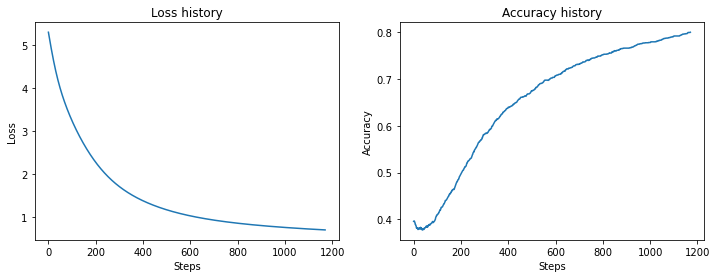

In [45]:
# 각 숫자에 대해 이진 분류 모델 학습 및 가중치 저장
weights = []

for i in range(10):
    print(f"Training model for number {i}")
    train_X, train_y = make_sample(idx = i)
    train_X = np.insert(train_X, 0, 1, axis=1)
    w = train(train_X, train_y)
    weights.append(w)

In [46]:
# 주어진 이미지의 숫자를 예측하는 함수
def predict_number(image, weights):
    test_X = image.astype('float') / 255
    test_X = test_X.reshape(-1)
    test_X = np.insert(test_X, 0, 1)
    
    predictions = []
    for w in weights:
        pred = 1 / (1 + np.exp(-test_X.dot(w)))
        predictions.append(pred[0])
    
    return np.argmax(predictions)

In [47]:
# eval
test_X = test_raw_img.astype('float')/255    
test_X = test_X.reshape(len(test_X.squeeze()), -1)
test_X = np.insert(test_X, 0, 1, axis=1) # + bias
print('shape of test_X : ', test_X.shape)
print('shape of test_label : ', test_label.shape)

shape of test_X :  (10000, 785)
shape of test_label :  (10000,)


In [48]:
# make prediction using argmax
max_preds = []
for test_img in test_raw_img:
    pred = predict_number(test_img, weights)
    max_preds.append(pred)

max_pred = np.array(max_preds).reshape(-1)
acc = np.sum(np.where(test_label==max_pred, True, False))/len(test_X)
print('accuracy : ', acc)

accuracy :  0.5091


In [52]:
# 테스트 이미지를 사용하여 숫자 예측
test_image_idx = 100
predicted_number = predict_number(test_raw_img[test_image_idx], weights)
print(f"Predicted number: {predicted_number}")
print(f"Actual number: {test_label[test_image_idx]}")

Predicted number: 6
Actual number: 6


In [53]:
# 테스트 이미지를 사용하여 숫자 예측
test_image_idx = 150
predicted_number = predict_number(test_raw_img[test_image_idx], weights)
print(f"Predicted number: {predicted_number}")
print(f"Actual number: {test_label[test_image_idx]}")

Predicted number: 0
Actual number: 9


# 실습 3

### L2 Regularization

In [12]:
from dataset.mnist import load_mnist

(train_raw_img, train_label), (test_raw_img, test_label) = load_mnist(flatten=False, normalize=False)
print(train_raw_img.shape)
print(train_label.shape)

(60000, 1, 28, 28)
(60000,)


In [13]:
# train_dataset split according to the number
new_train_img = [[] for _ in range(10)]
new_train_label = [[] for _ in range(10)]

for i in range(len(train_label)) :
    new_train_img[train_label[i]].append(train_raw_img[i])
    new_train_label[train_label[i]].append(train_label[i])

print(len(new_train_img[0])) # 0에 해당하는 image 개수
print(new_train_img[0][0].shape) # 0에 해당하는 image중 첫번째 image의 shape

5923
(1, 28, 28)


In [14]:
# idx에 해당하는 숫자를 대상으로 샘플 데이터 생성
def make_sample(idx) :
    sample_img = []
    sample_label = []
    
    # data sampling 
    for i in range(10) :
        if i == idx :
            sample_img += new_train_img[i][:1000]
            sample_label += (new_train_label[i][:1000])
        else :
            sample_img += new_train_img[i][:111]
            sample_label += (new_train_label[i][:111])

    sample_img = np.array(sample_img)
    sample_label = np.array(sample_label)
    
    # normalization (set value 0 ~ 1)
    sample_img = sample_img.astype('float')/255
    
    # target number는 1, 아니면 0
    sample_label = np.where(sample_label==idx, 1 ,0)
    
    # reshape
    sample_img = sample_img.reshape(len(sample_img.squeeze()), -1)
    sample_label = sample_label.reshape(len(sample_label.squeeze()), -1)
    
    return sample_img, sample_label

In [15]:
# idx = target number
train_X, train_y = make_sample(idx = 0)
# bias 추가
train_X = np.insert(train_X, 0, 1, axis=1)

print(train_y.shape)

(1999, 1)


In [21]:
def L2_regularization(w, lamb = 0.01) :
    # L2 regularization
    l2_reg = lamb * np.sum(np.square(w))
    return l2_reg

In [26]:
# train
def train(X, y) :
    w = np.random.randn(len(X[0]), 1) # 
    lr = 0.01 # learning rate(수정)
    step = 0
    acc = 0
    
    loss_history = []
    acc_history = []
    
    while (acc < 0.85) :
        step += 1
        correct = 0
        
        # predict
        preds = 1 / (1+np.exp(-X.dot(w)))
        loss = CrossEntropyLoss(preds, y)+L2_regularization(w,0.01)
        
        result = np.where(preds>0.5, 1, 0)
        acc = np.sum(np.where(result==y, True, False))/len(preds)
        
        print("total step : %d " % step)
        print("error : %f, accuarcy : %f" % (loss, acc))
        
        loss_history.append(loss)
        acc_history.append(acc)
        
        # gradient descent 수행
        gradient = np.dot(X.T, (preds - y)) / len(X)
        gradient += 0.01 * w
        w -= lr * gradient
    
    # loss와 accuracy 시각화
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(loss_history)
    plt.title("Loss history")
    plt.xlabel("Steps")
    plt.ylabel("Loss")

    plt.subplot(1, 2, 2)
    plt.plot(acc_history)
    plt.title("Accuracy history")
    plt.xlabel("Steps")
    plt.ylabel("Accuracy")

    plt.show()
        
    return w

total step : 1 
error : 12.196674, accuarcy : 0.520260
total step : 2 
error : 12.078851, accuarcy : 0.526263
total step : 3 
error : 11.963972, accuarcy : 0.531766
total step : 4 
error : 11.852293, accuarcy : 0.538769
total step : 5 
error : 11.744051, accuarcy : 0.542271
total step : 6 
error : 11.639455, accuarcy : 0.546273
total step : 7 
error : 11.538690, accuarcy : 0.551776
total step : 8 
error : 11.441911, accuarcy : 0.552776
total step : 9 
error : 11.349230, accuarcy : 0.563782
total step : 10 
error : 11.260714, accuarcy : 0.567784
total step : 11 
error : 11.176383, accuarcy : 0.576288
total step : 12 
error : 11.096208, accuarcy : 0.583792
total step : 13 
error : 11.020124, accuarcy : 0.593297
total step : 14 
error : 10.948034, accuarcy : 0.599800
total step : 15 
error : 10.879815, accuarcy : 0.606803
total step : 16 
error : 10.815326, accuarcy : 0.613307
total step : 17 
error : 10.754410, accuarcy : 0.617309
total step : 18 
error : 10.696899, accuarcy : 0.624812
t

error : 9.072695, accuarcy : 0.813407
total step : 206 
error : 9.069226, accuarcy : 0.813907
total step : 207 
error : 9.065764, accuarcy : 0.813907
total step : 208 
error : 9.062309, accuarcy : 0.814407
total step : 209 
error : 9.058862, accuarcy : 0.814407
total step : 210 
error : 9.055421, accuarcy : 0.813907
total step : 211 
error : 9.051987, accuarcy : 0.814407
total step : 212 
error : 9.048561, accuarcy : 0.814907
total step : 213 
error : 9.045142, accuarcy : 0.815408
total step : 214 
error : 9.041729, accuarcy : 0.815408
total step : 215 
error : 9.038323, accuarcy : 0.815408
total step : 216 
error : 9.034925, accuarcy : 0.815408
total step : 217 
error : 9.031533, accuarcy : 0.815408
total step : 218 
error : 9.028148, accuarcy : 0.815408
total step : 219 
error : 9.024769, accuarcy : 0.815408
total step : 220 
error : 9.021398, accuarcy : 0.815408
total step : 221 
error : 9.018033, accuarcy : 0.815408
total step : 222 
error : 9.014674, accuarcy : 0.815908
total step

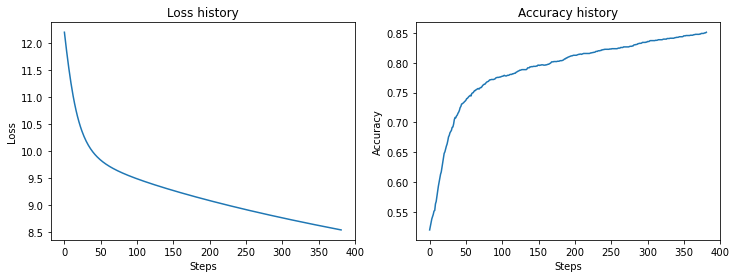

In [27]:
# save weight
w = train(train_X, train_y)

In [109]:
# eval (accuracy)
def eval(idx, w) :
    test_X = test_raw_img.astype('float')/255    
    test_X = test_X.reshape(len(test_X.squeeze()), -1)
    # bias
    test_X = np.insert(test_X, 0, 1, axis=1) 

    test_y = np.where(test_label==idx, 1 ,0)
    test_y = test_y.reshape(len(test_y.squeeze()), -1)
    
    preds = 1/(1+np.exp(-test_X.dot(w)))
    result = np.where(preds>0.5, 1, 0)
    
    acc = np.sum(np.where(result==test_y, True, False))/len(preds)
    print('accuracy : ', acc)

eval(idx=0, w=w)

accuracy :  0.8238
